<a href="https://colab.research.google.com/github/ankitkrtiwari7/my_first_analysis-AIRBNB/blob/main/airbnbn_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Airbnb NYC 2019.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.isnull().sum()     # getting the total no. of null value

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Checking the Data types shape of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# checking different type of columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# Chekcking the number of unique values in each column
_dict_ = {}
for i in list(df.columns):
  _dict_.update({i:df[i].nunique()})
_dict_

{'availability_365': 366,
 'calculated_host_listings_count': 47,
 'host_id': 37457,
 'host_name': 11452,
 'id': 48895,
 'last_review': 1764,
 'latitude': 19048,
 'longitude': 14718,
 'minimum_nights': 109,
 'name': 47905,
 'neighbourhood': 221,
 'neighbourhood_group': 5,
 'number_of_reviews': 394,
 'price': 674,
 'reviews_per_month': 937,
 'room_type': 3}

In [9]:
#checking the number of listings by host_name
df.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [10]:
#checkig the number of listing of Michael
df[df['host_name'] =='Michael']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
151,36121,Lg Rm in Historic Prospect Heights,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,2013-05-10,0.09,1,339
412,138216,Sunny and Spacious Designer's Home,674970,Michael,Brooklyn,Greenpoint,40.72212,-73.94254,Entire home/apt,141,5,8,2018-07-08,0.21,1,9
519,189135,Hell's Kitchen Funky 80's Hideaway!,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,2019-07-01,1.00,1,353
616,233189,NYC Studio in Heart of Times Square,1220414,Michael,Manhattan,Hell's Kitchen,40.76166,-73.99675,Entire home/apt,179,30,83,2019-05-31,0.88,1,292
811,289037,"2BR in Cobble Hill, Brooklyn, NY",632334,Michael,Brooklyn,Carroll Gardens,40.68353,-73.99140,Entire home/apt,189,2,13,2016-09-05,0.18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48378,36228909,Sunny SoHo Penthouse w/ Pvt. Terrace!,272485928,Michael,Manhattan,SoHo,40.72336,-74.00465,Entire home/apt,600,3,0,NaN,NaN,1,179
48531,36310247,Spacious 1 Bedroom With Private Garden,25498509,Michael,Brooklyn,Clinton Hill,40.68183,-73.96464,Entire home/apt,100,1,0,NaN,NaN,1,6
48786,36426788,Serene Room 5 mins from JFK / 15 mins from LGA,266645207,Michael,Queens,Laurelton,40.67025,-73.74548,Private room,75,1,0,NaN,NaN,2,180
48830,36450318,"LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE",151831356,Michael,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,NaN,NaN,1,14


In [11]:
#checking the aspects of numeric data in thes set
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
df['name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

In [13]:
# removeing the last_review column
df= df.drop(['last_review'],axis=1)

In [15]:
#checking data removed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [16]:
# reviews per month has lot of null values as well, let replace them with 0
df['reviews_per_month'].replace(np.nan,0,inplace =True)

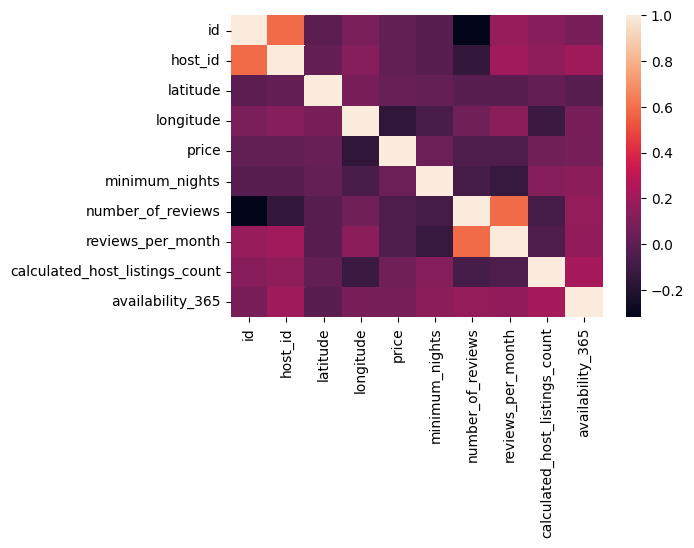

In [17]:
plt.rcParams['figure.dpi'] = 100
sns.heatmap(df.corr())